## Import Libraries

In [1]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

## Load Dataset

In [2]:
# load all sheets
all_dfs = pd.read_excel("campaign_performance.xlsx", sheet_name=None)

# list sheet name
for name, df in all_dfs.items():
    print(f"Sheet: {name}, Shape: {df.shape}")

Sheet: campaigns, Shape: (4, 6)
Sheet: campaign_metrics, Shape: (4, 4)
Sheet: transactions, Shape: (5, 8)


In [4]:
df_cam = all_dfs['campaigns']
df_cmt = all_dfs['campaign_metrics']
df_trx = all_dfs['transactions']

In [9]:
df_cam

,campaign_id,campaign_name,start_date,end_date,budget,target_audience
0,301,Holiday Sale,2024-01-01,2024-01-15,5000,All Customers
1,302,New Year Promo,2024-01-10,2024-01-20,7000,New Customers
2,303,Spring Discount,2024-03-01,2024-03-15,6000,Loyal Customers
3,304,Clearance Sale,2024-04-01,2024-04-15,4000,All Customers


In [10]:
df_cmt

,campaign_id,Impressions,Clicks,website_landing_hits
0,301,50000,5000,4825
1,302,70000,3500,3378
2,303,60000,4000,3860
3,304,40000,2000,1930


In [11]:
df_trx

,campaign_id,transaction_id,amount,transaction_date,customer_id,gender,age,product_category
0,301,1,200,2024-01-05,e7751463-0879-45d8-86fe-c4612542176e,Female,41,Groceries
1,301,2,150,2024-01-06,84855a69-9e05-4adf-b4c8-5b1c9e083279,Female,38,Health & Beauty
2,302,3,350,2024-01-12,64245183-ece7-427e-bbb7-ccc60c85cbe7,Male,35,Health & Beauty
3,303,4,500,2024-03-10,caac8e8d-0680-4664-a5b3-370e85d28e66,Male,63,Groceries
4,304,5,300,2024-04-05,2b3c9077-dbf0-42ea-872f-265710d5f6c8,Female,31,Electronics


In [15]:
# combine all data
temp = pd.merge(df_cam, df_cmt, on='campaign_id', how='inner')
df = pd.merge(temp, df_trx, on='campaign_id', how='inner')

In [129]:
df

,campaign_id,campaign_name,start_date,end_date,budget,target_audience,Impressions,Clicks,website_landing_hits,transaction_id,amount,transaction_date,customer_id,gender,age,product_category
0,301,Holiday Sale,2024-01-01,2024-01-15,5000,All Customers,50000,5000,4825,1,200,2024-01-05,e7751463-0879-45d8-86fe-c4612542176e,Female,41,Groceries
1,301,Holiday Sale,2024-01-01,2024-01-15,5000,All Customers,50000,5000,4825,2,150,2024-01-06,84855a69-9e05-4adf-b4c8-5b1c9e083279,Female,38,Health & Beauty
2,302,New Year Promo,2024-01-10,2024-01-20,7000,New Customers,70000,3500,3378,3,350,2024-01-12,64245183-ece7-427e-bbb7-ccc60c85cbe7,Male,35,Health & Beauty
3,303,Spring Discount,2024-03-01,2024-03-15,6000,Loyal Customers,60000,4000,3860,4,500,2024-03-10,caac8e8d-0680-4664-a5b3-370e85d28e66,Male,63,Groceries
4,304,Clearance Sale,2024-04-01,2024-04-15,4000,All Customers,40000,2000,1930,5,300,2024-04-05,2b3c9077-dbf0-42ea-872f-265710d5f6c8,Female,31,Electronics


## Analysis

### 1.a. Select Campaign

In [18]:
campaign = df[df['campaign_name']=='Holiday Sale']
campaign

,campaign_id,campaign_name,start_date,end_date,budget,target_audience,Impressions,Clicks,website_landing_hits,transaction_id,amount,transaction_date,customer_id,gender,age,product_category
0,301,Holiday Sale,2024-01-01,2024-01-15,5000,All Customers,50000,5000,4825,1,200,2024-01-05,e7751463-0879-45d8-86fe-c4612542176e,Female,41,Groceries
1,301,Holiday Sale,2024-01-01,2024-01-15,5000,All Customers,50000,5000,4825,2,150,2024-01-06,84855a69-9e05-4adf-b4c8-5b1c9e083279,Female,38,Health & Beauty


from the campaign i select the holiday sale because had most transaction compared to the other campaign

### 2. Campaign Performance

#### a. Correlation Analysis

In [35]:
# aggregate to get conversion metric (sales and count)
temp = df_trx\
        .groupby('campaign_id')\
        .agg({'amount' : 'sum',
            'customer_id' : 'count'})\
        .rename(columns={'amount' : 'sales',
                        'customer_id' : 'num_transaction'})\
        .reset_index()

# combine to campaign metric data
df_perf = pd.merge(df_cmt, temp, on='campaign_id', how='inner')
df_perf

,campaign_id,Impressions,Clicks,website_landing_hits,sales,num_transaction
0,301,50000,5000,4825,350,2
1,302,70000,3500,3378,350,1
2,303,60000,4000,3860,500,1
3,304,40000,2000,1930,300,1


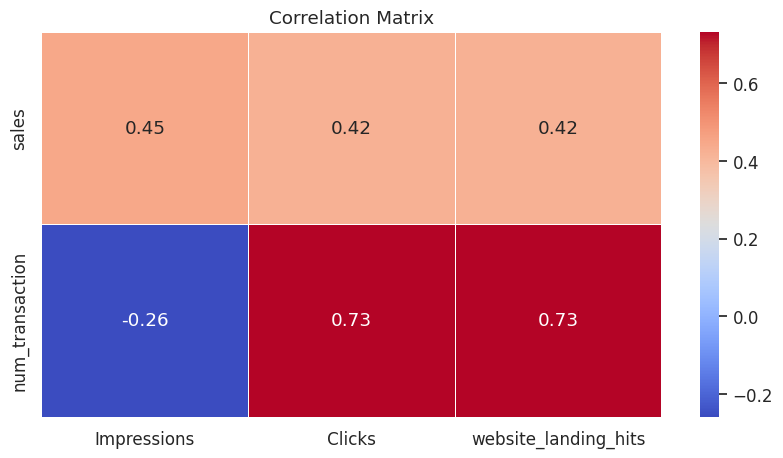

In [51]:
# calculate correlation
corr_var = df_perf[['Impressions', 'Clicks', 'website_landing_hits', 'sales', 'num_transaction']].corr()
corr_var = corr_var.loc[['sales','num_transaction'],['Impressions', 'Clicks', 'website_landing_hits']]

# visualization
plt.figure(figsize=(10, 5))
sns.heatmap(corr_var, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


- clicks and website landing hits have strong positive correlation (0.73) with number of transactions, indicating that driving user engagement directly increases sales.
- impressions have weak correlation (-0.26) with number of transactions, inidcate exposre alone does not lead to conversion.
- sales only show moderate correlation (0.42 - 0.45) with impressions, clicks, and website landing hits.
- for further steps is more focus on boosting clicks and website landing hits.
- pair engagement strategies with upselling or high value offer to increase revenue per transaction.

#### b. Cost Effectiveness

In [63]:
# combine with budget
df_perf = pd.merge(df_perf, df_cam[['campaign_id', 'campaign_name', 'budget']], on='campaign_id', how='inner')

# calculate cost per click and return on investment
df_perf['CPC'] = df_perf['budget'] / df_perf['Clicks']
df_perf['ROI'] = (df_perf['sales'] - df_perf['budget']) / df_perf['budget']

df_perf

,campaign_id,Impressions,Clicks,website_landing_hits,sales,num_transaction,campaign_name,budget,CPC,ROI
0,301,50000,5000,4825,350,2,Holiday Sale,5000,1.0,-0.930000
1,302,70000,3500,3378,350,1,New Year Promo,7000,2.0,-0.950000
2,303,60000,4000,3860,500,1,Spring Discount,6000,1.5,-0.916667
3,304,40000,2000,1930,300,1,Clearance Sale,4000,2.0,-0.925000


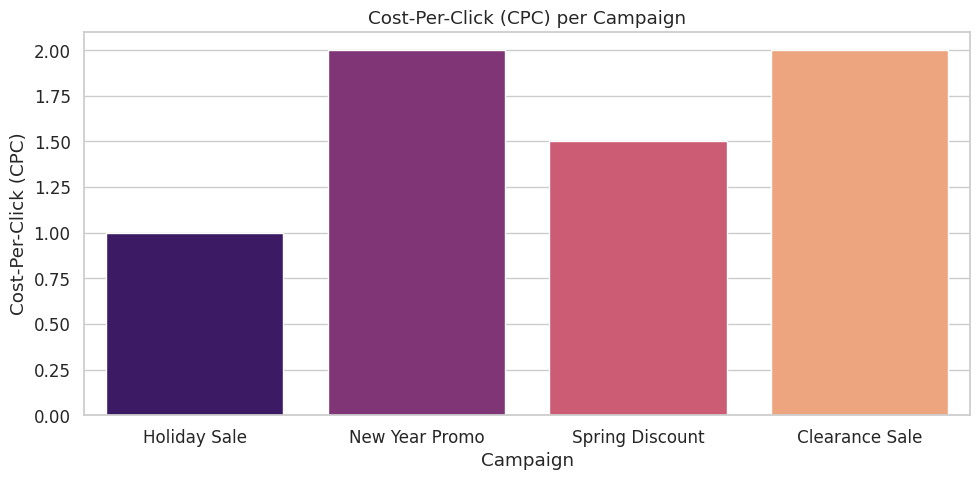

In [72]:
# plot cost per click
plt.figure(figsize=(10, 5))
sns.barplot(data=df_perf, x='campaign_name', y='CPC', palette='magma')
plt.title('Cost-Per-Click (CPC) per Campaign')
plt.ylabel('Cost-Per-Click (CPC)')
plt.xlabel('Campaign')
plt.tight_layout()
plt.show()

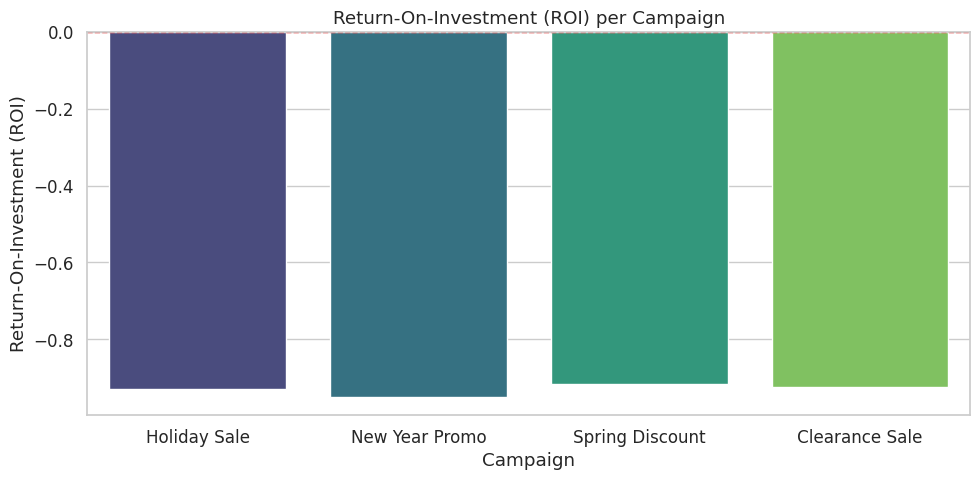

In [79]:
# plot return on investment
plt.figure(figsize=(10, 5))
sns.barplot(data=df_perf, x='campaign_name', y='ROI', palette='viridis')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Return-On-Investment (ROI) per Campaign')
plt.ylabel('Return-On-Investment (ROI)')
plt.xlabel('Campaign')
plt.tight_layout()
plt.show()

- holiday sale campaign had the lowest cost per click (CPC) at 1, indicating efficient use of ad budget to drive engagement.
- but still result high negative return on investment (ROI) at -0.93, showing that clicks do not translate into sufficient revenue.
- suggest there is conversion issues after click, such as poor offer relevance, lack of purchase intention, or uninterest into landing page.
- compared to the other campaign, holiday sale spent more efficient at CPC but not more effective at ROI.
- indicating that minimal ROI across campaign implies that must improve the post click funnel is more critical compared to adjusting media spend.
- especially to maintain the low CPC like holiday sale but must improve the post click experience to generate more conversion or ROI

#### c. Bounce Rates

In [ ]:
# calculate bounce rate
df_perf['Bounce Rate'] = 1 - (df_perf['website_landing_hits']/df_perf['Clicks'])

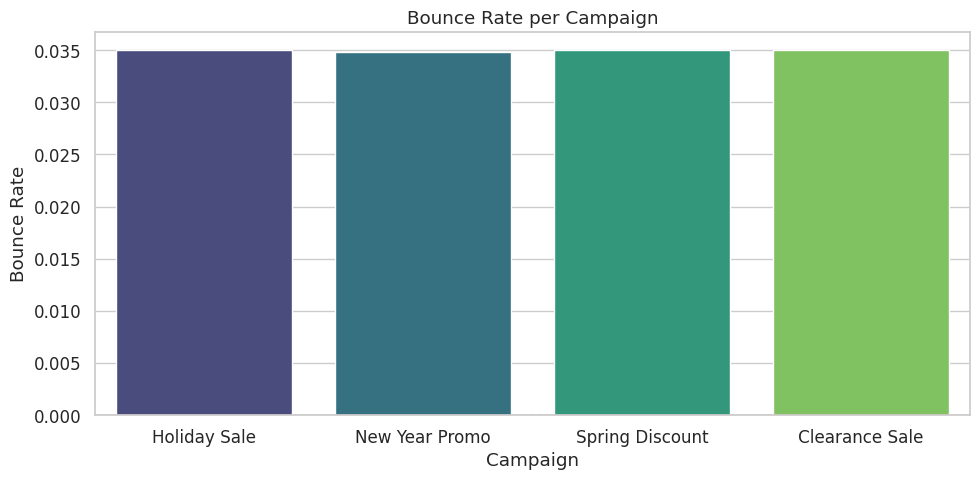

In [81]:
# plot bounce rate
plt.figure(figsize=(10, 5))
sns.barplot(data=df_perf, x='campaign_name', y='Bounce Rate', palette='viridis')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Bounce Rate per Campaign')
plt.ylabel('Bounce Rate')
plt.xlabel('Campaign')
plt.tight_layout()
plt.show()

- holiday sale campaign had a low bounce rate of 3.5%, meaning the vast majority of users who clicked the ad successfully reached the landing page.
- indicates that technical delivery such as page load speed or link accuracy was not an issue.
- despite this, the campaign still showed poor ROI, suggesting that the problem lies after the landing page, likely in content quality, offer relevance, or conversion strategy.
- the bounce rate is in line with other campaigns, confirming that engagement drop-off did not occur at the point of access.
- further action is maintain current technical setup for holiday sale, but improve the landing page content, design, or offer clarity to better convert incoming traffic into sales.


### 3. Customer Insight

#### a. Responded Best

In [111]:
# define by target audience, assumes all customer is other
df_cust = pd.merge(df_perf, df_cam[['campaign_id', 'target_audience']], on='campaign_id', how='inner')
df_cust['target_audience'] = df_cust['target_audience'].replace({'All Customers':'Other', 'New Customers':'New', 'Loyal Customers':'Repeat'})
df_cust = df_cust\
          .groupby('target_audience')\
          .sum(numeric_only=True)\
          [['Impressions', 'Clicks', 'website_landing_hits', 'sales', 'num_transaction', 'budget']]\
          .reset_index()\
            .rename(columns={'target_audience':'Customer Segment'})

df_cust

,Customer Segment,Impressions,Clicks,website_landing_hits,sales,num_transaction,budget
0,New,70000,3500,3378,350,1,7000
1,Other,90000,7000,6755,650,3,9000
2,Repeat,60000,4000,3860,500,1,6000


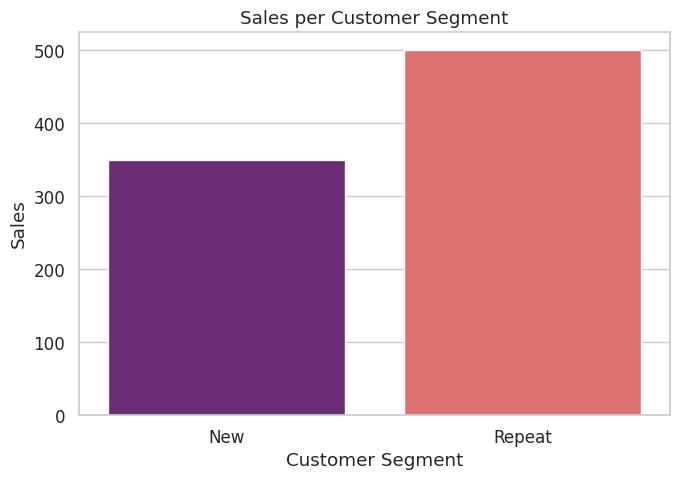

In [116]:
# only using New vs Repeat
temp = df_cust[df_cust['Customer Segment'].isin(['New', 'Repeat'])]

# plot cost per click
plt.figure(figsize=(7, 5))
sns.barplot(data=temp, x='Customer Segment', y='sales', palette='magma')
plt.title('Sales per Customer Segment')
plt.ylabel('Sales')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

In [117]:
# calculate return on investment
df_cust['ROI'] = (df_cust['sales'] - df_cust['budget']) / df_cust['budget']

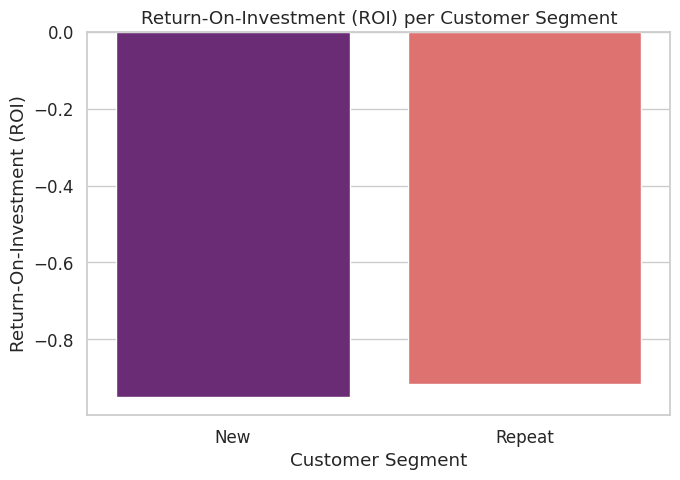

In [119]:
temp = df_cust[df_cust['Customer Segment'].isin(['New', 'Repeat'])]

# plot cost per click
plt.figure(figsize=(7, 5))
sns.barplot(data=temp, x='Customer Segment', y='ROI', palette='magma')
plt.title('Return-On-Investment (ROI) per Customer Segment')
plt.ylabel('Return-On-Investment (ROI)')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

- new customers generated 350 in sales with an ROI of –0.95, indicating poor conversion and the least efficient use of budget.
- repeat customers generated 500 in sales with a better ROI of –0.92, showing stronger engagement and higher return per dollar spent.
- repeat customers outperformed new customers in both revenue and ROI, despite likely being a smaller audience.
- recommendation is focus future campaigns on repeat customers, who deliver better performance and return compared to new customer segments.

#### b. Product Category Preferences

In [126]:
df.groupby('product_category')\
    .agg({'amount' : 'sum',
          'customer_id' : 'count',
          'campaign_id' : 'count'})\
    .rename(columns={'amount' : 'sales',
                    'customer_id' : 'num_transaction',
                    'campaign_id' : 'num_campaign'})\
    .reset_index()

,product_category,sales,num_transaction,num_campaign
0,Electronics,300,1,1
1,Groceries,700,2,2
2,Health & Beauty,500,2,2


- health & beauty and groceries vary on different campaign type.
- health & beauty and groceries had most frequent purchase.
- customer tend to buy electronic on clearance sale campaign, suggesting low demand because only 1 transaction.
- future campaign more focus on health & beauty and groceries because align with current customer preference.

#### c. Demographics and Behaviours

In [128]:
df.groupby('gender')\
    .agg({'amount' : 'sum',
          'customer_id' : 'count',
          'campaign_id' : 'count'})\
    .rename(columns={'amount' : 'sales',
                    'customer_id' : 'num_transaction',
                    'campaign_id' : 'num_campaign'})\
    .reset_index()

,gender,sales,num_transaction,num_campaign
0,Female,650,3,3
1,Male,850,2,2


- female more frequent, encourage higher basket size through bundling, discount on adds-on, or loyalty reward for increase purchase.
- male more spend, upsell or promote high values product.

### 4. Visualization

##### a. Engagement Trends Over Time

In [140]:
# extract data to have daily engagement
temp = pd.merge(df_cam, df_cmt, on='campaign_id', how='inner')
expand_row = []

for _, row in temp.iterrows():
    dates = pd.date_range(start=row['start_date'], end=row['end_date'])
    n_days = len(dates)
    for date in dates:
        expand_row.append({
            'date': date,
            'campaign_id': row['campaign_id'],
            'campaign_name': row['campaign_name'],
            'daily_impressions': row['Impressions'] // n_days,
            'daily_clicks': row['Clicks'] // n_days,
            'daily_hits': row['website_landing_hits'] // n_days
        })

df_engagement = pd.DataFrame(expand_row)
df_daily_engage = df_engagement.groupby('date')[['daily_impressions', 'daily_clicks', 'daily_hits']].sum().reset_index()

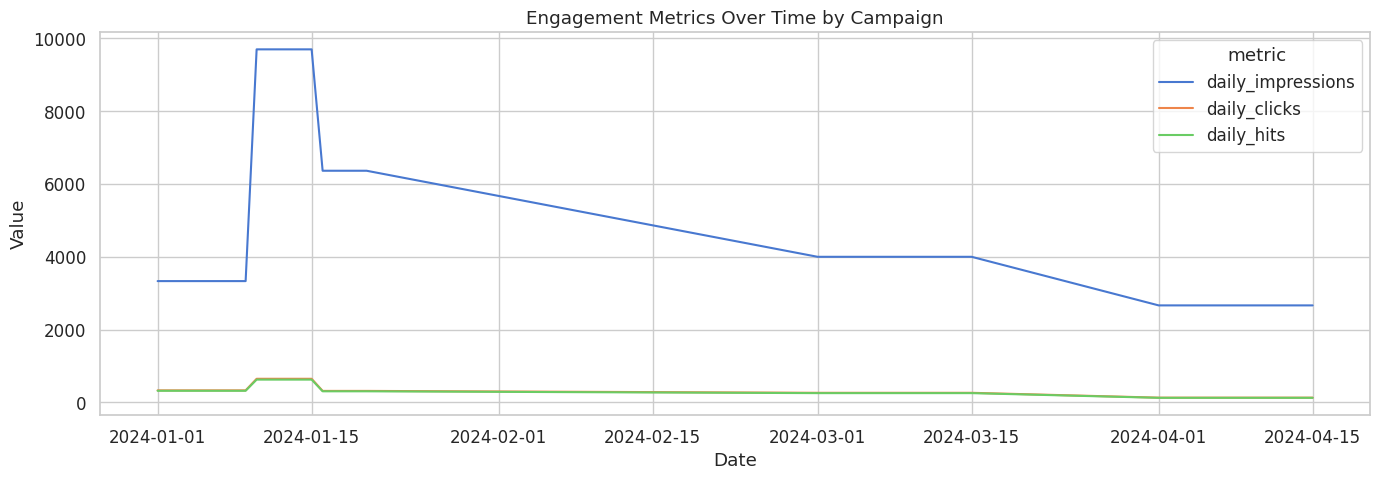

In [170]:
melted = df_daily_engage.melt(
    id_vars=['date'],
    value_vars=['daily_impressions', 'daily_clicks', 'daily_hits'],
    var_name='metric', value_name='value'
)

plt.figure(figsize=(14, 5))
sns.lineplot(data=melted, x='date', y='value', hue='metric', markers='o', dashes=False)
plt.title('Engagement Metrics Over Time by Campaign')
plt.xlabel('Date')
plt.ylabel('Value')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

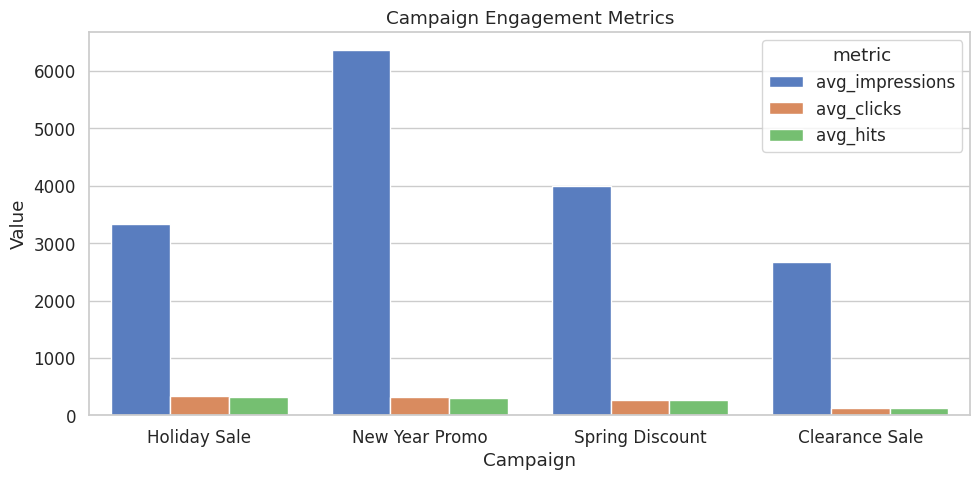

In [174]:
# extract for daily engagement
temp['campaign_duration_day'] = (temp['end_date'] - temp['start_date']).dt.days + 1 # add 1 day because end date is still campaign
temp['avg_impressions'] = temp['Impressions'] / temp['campaign_duration_day']
temp['avg_clicks'] = temp['Clicks'] / temp['campaign_duration_day']
temp['avg_hits'] = temp['website_landing_hits'] / temp['campaign_duration_day']

melted = temp[['campaign_name',
                'avg_impressions',
                'avg_clicks',
                'avg_hits']].melt(
            id_vars=['campaign_name'],
            value_vars=['avg_impressions', 'avg_clicks', 'avg_hits'],
            var_name='metric', value_name='value')

plt.figure(figsize=(10, 5))
sns.barplot(data=melted, x='campaign_name', y='value', hue='metric')
plt.title('Campaign Engagement Metrics')
plt.xlabel('Campaign')
plt.ylabel('Value')
# plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- 10 january 2024 until 15 january 2024 is peak for engagement, because 2 campaing holiday sale amd new year promo
- holiday is the most engaged campaign
- have campaign in january for Q1.

#### b. Comparison of Customer Segments

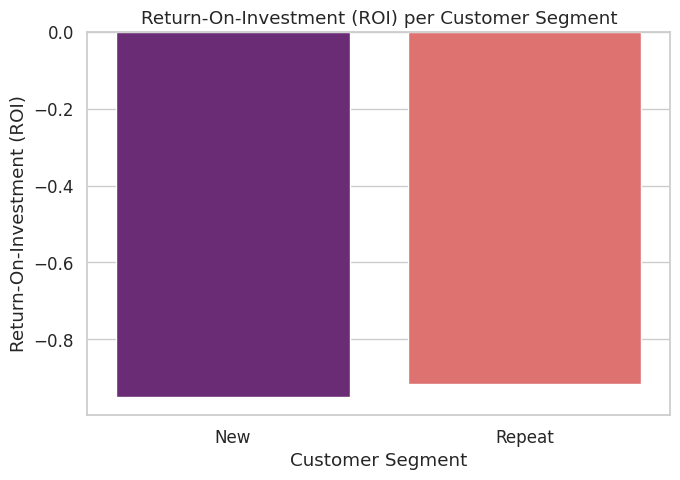

In [ ]:
temp = df_cust[df_cust['Customer Segment'].isin(['New', 'Repeat'])]

# plot roi
plt.figure(figsize=(7, 5))
sns.barplot(data=temp, x='Customer Segment', y='ROI', palette='magma')
plt.title('Return-On-Investment (ROI) per Customer Segment')
plt.ylabel('Return-On-Investment (ROI)')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

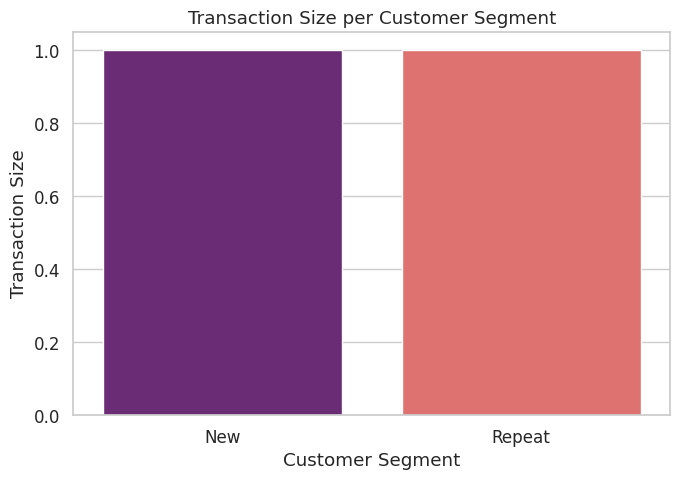

In [ ]:
temp = df_cust[df_cust['Customer Segment'].isin(['New', 'Repeat'])]

# plot transaction size
plt.figure(figsize=(7, 5))
sns.barplot(data=temp, x='Customer Segment', y='num_transaction', palette='magma')
plt.title('Transaction Size per Customer Segment')
plt.ylabel('Transaction Size')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()

- new customers generated 350 in sales with an ROI of –0.95, indicating poor conversion and the least efficient use of budget.
- repeat customers generated 500 in sales with a better ROI of –0.92, showing stronger engagement and higher return per dollar spent.
- repeat customers outperformed new customers in both revenue and ROI, despite likely being a smaller audience.
- recommendation is focus future campaigns on repeat customers, who deliver better performance and return compared to new customer segments.


#### c. Product Category Sales DIstribution

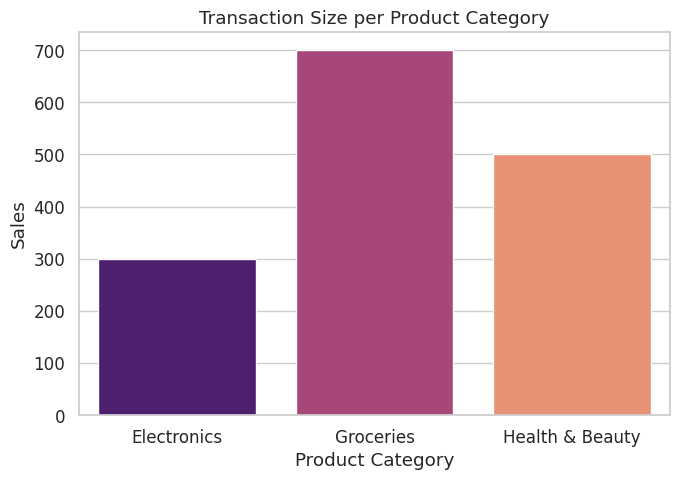

In [185]:
df_product_cat = df.groupby('product_category')\
                .agg({'amount' : 'sum',
                    'customer_id' : 'count',
                    'campaign_id' : 'count'})\
                .rename(columns={'amount' : 'sales',
                                'customer_id' : 'num_transaction',
                                'campaign_id' : 'num_campaign'})\
                .reset_index()

# plot sales
plt.figure(figsize=(7, 5))
sns.barplot(data=df_product_cat, x='product_category', y='sales', palette='magma')
plt.title('Transaction Size per Product Category')
plt.ylabel('Sales')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

- health & beauty and groceries vary on different campaign type
- health & beauty and groceries had most frequent pruchase
- customer tend to buy electronic on clearance sale campaign, suggesting low demand because only 1 transaction
- future campaign more focus on health & beauty and groceries because align with current customer preference

### 5. Recommendation and Conclusion

- clicks and website visits drive transactions, but not revenue, the issue lies after the click, not before it.
- the Holiday Sale had great CPC and low bounce rate, but poor ROI pointing to weak landing page content or offer relevance.
- repeat customers convert better and bring higher ROI. focus on them.
- Health & Beauty and Groceries are top-performing categories. prioritize them.
- female customers buy more often. male customers spend more. Tailor campaigns to both.
- peak engagement happened in early january, double down on Q1 launches.


**Optimizing Audience Targeting**
- prioritize repeat customers, who show higher ROI and stronger engagement than new customers, focus retargeting and loyalty campaigns here.
- segment by gender behavior: offer bundles and discounts to increase spend from frequent female buyers, promote premium or high-value items to male customers who spend more per transaction.

**Enhancing Campaign Efficiency**
- improve post-click experience, enhance landing pages, refine offers, and simplify checkout to convert existing traffic into sales.
- maintain low CPC like the holiday sale, but shift budget toward channels with higher engagement to conversion ratios.
- time campaigns during proven peak windows such as early january to capitalize on naturally higher engagement without increasing spend.
